In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 1 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --run_from_scratch 1 --client_num 5 --client_opt_name sgd --client_epoch 1 --client_lr 0.01 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.1 --apply_lora --lora_rank 16 --sketch_size -1

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt sgd --lr 1.0 --epoch 200 --analysis loss --log_interval 1 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --apply_lora --lora_rank 16

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt sgd --lr 0.0001 --epoch 2000 --analysis loss --log_interval 10 --batch_size 128 --momentum 0.9 --weight_decay 1e-4
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt sgd --lr 0.0001 --epoch 500 --analysis loss --log_interval 10 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --apply_lora --lora_rank 16

results/20newsgroups/CrossEntropyLoss/sgd/gpt2/lr_0.0001/moment_0.9/wd_0.0001/batch_size_128/epoch_500/
results/20newsgroups/CrossEntropyLoss/sgd/gpt2/lora_rank_16/lora_alpha_16/lr_0.0001/moment_0.9/wd_0.0001/batch_size_128/epoch_500/
results/20newsgroups/CrossEntropyLoss/sgd/gpt2/lora_rank_16/lora_alpha_16/cls_lr_0.0001/lr_0.0001/moment_0.9/wd_0.0001/batch_size_128/epoch_500/


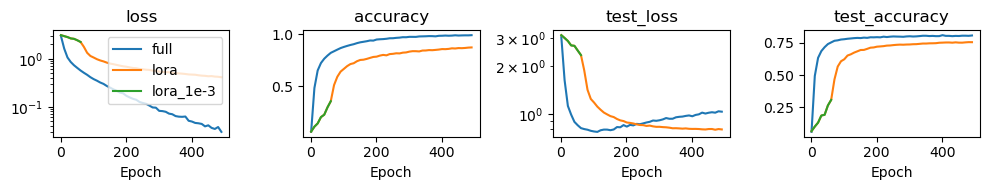

In [15]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.0001, "20newsgroups", 'CrossEntropyLoss', "sgd", 0.9, 1e-4, 128, 500
model_name= "gpt2"

model_params = {}
model_params["full"] = {}
model_params["lora"] = {"lora_rank": 16, "lora_alpha": 16}
model_params["lora_1e-3"] = {"lora_rank": 16, "lora_alpha": 16, "cls_lr": 0.0001}

opt_params = {}
opt_params["full"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':"sgd", 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_1e-3"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':"sgd", 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["full", "lora", "lora_1e-3"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 500 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.0001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.1 --epoch 500 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.0001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 500 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.0 --weight_decay 1e-4 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.0001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 5 --sketch_size -1 --apply_lora --lora_rank 16 --cls_lr 0.1

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_5.0/lora_rank_16/lora_alpha_16/cls_lr_0.1/server_opt_sgd/client_opt_sgd/client_lr_0.0001/client_momentum_0.9/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_500/


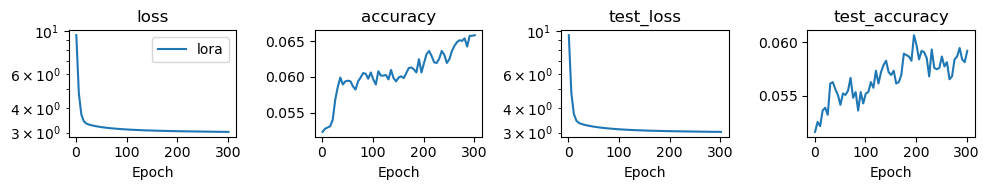

In [38]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 1.0, "20newsgroups", 'CrossEntropyLoss', "federated", 0.0, 0.0001, 128, 500
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.0001, 0.9, 0.0, 10, 1, -1, 5.0

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "cls_lr": 0.1, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
#adam as server optimizer
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 200 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 500 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.0 --weight_decay 0.0 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 500 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_0.01/moment_0.9/wd_0.01/batch_size_128/epoch_200/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_128/epoch_200/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_128/epoch_500/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weig

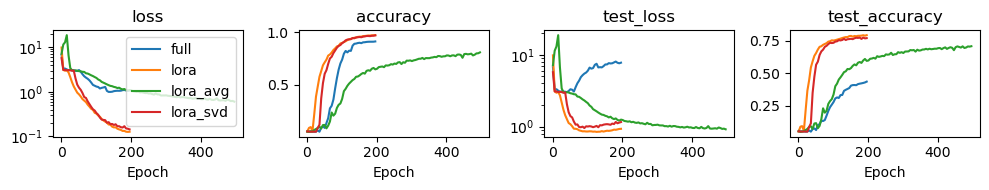

In [3]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.01, 128, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 10, 1, -1, 0.1

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.01, 'batch_size':batch_size, 'epochs':500}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["full", "lora", "lora_avg", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 200 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_200/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_500/


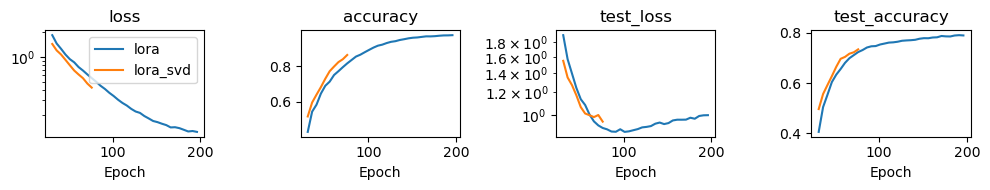

In [7]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.01, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.1

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.01, 'batch_size':batch_size, 'epochs':500}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=6)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/


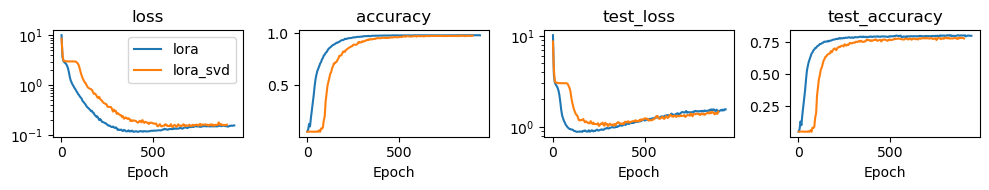

In [5]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.01, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.01, 'batch_size':batch_size, 'epochs':1000}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 200 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_200/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_200/


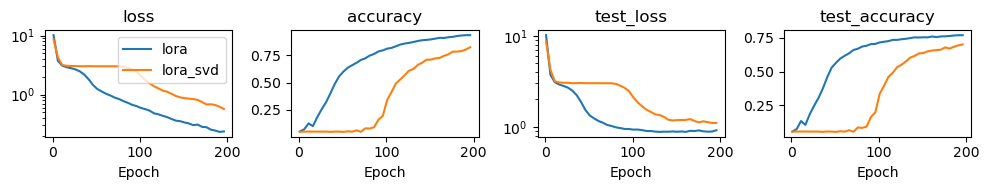

In [5]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.01, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.01, 'batch_size':batch_size, 'epochs':epochs}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.001 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0/batch_size_128/epoch_200/


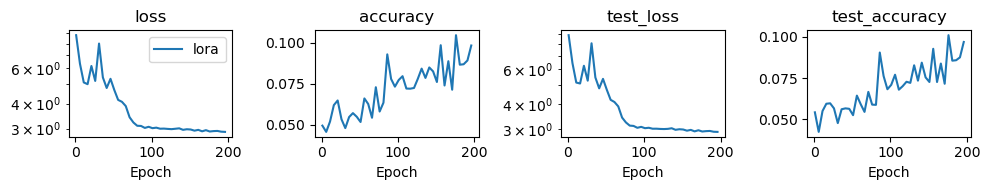

In [10]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.0, 0.0, 128, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 10, 1, -1, 0.01

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_svd"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.01, 'batch_size':batch_size, 'epochs':epochs}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 300 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.9 --weight_decay 0.0 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_128/epoch_300/


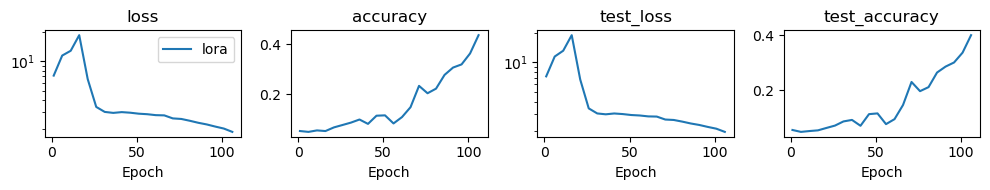

In [1]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.0, 128, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 10, 1, -1, 0.1

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':300}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_svd"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':500}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_128/epoch_500/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_128/epoch_500/


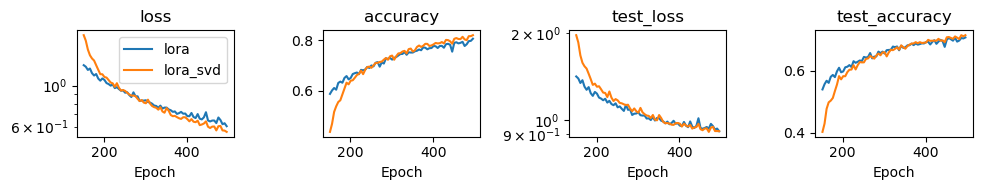

In [13]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.0, 128, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 10, 1, -1, 0.1

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_svd"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':500}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=30)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 500 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.001 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.001/batch_size_12/epoch_500/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.001/batch_size_12/epoch_500/


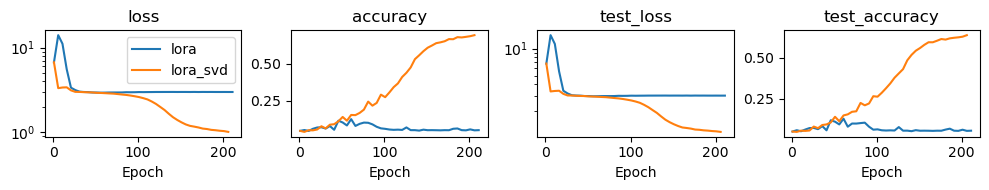

In [43]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.001, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.1

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_svd"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':500}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 500 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.9 --weight_decay 0.001 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.001/batch_size_128/epoch_500/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.001/batch_size_128/epoch_500/


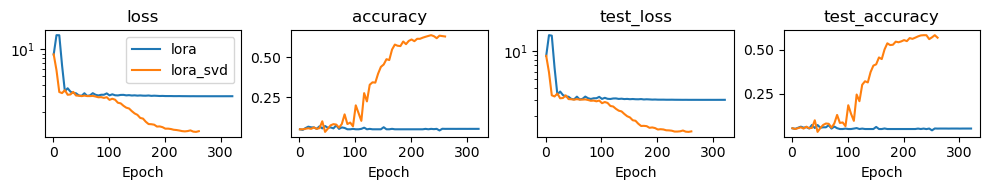

In [1]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.001, 128, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 10, 1, -1, 0.01

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':500}
opt_params["lora_svd"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':500}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.1 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.001 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg sketch
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd_grad
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd_het

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/fedlora_uba_5.0/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_12/epoch_1000/


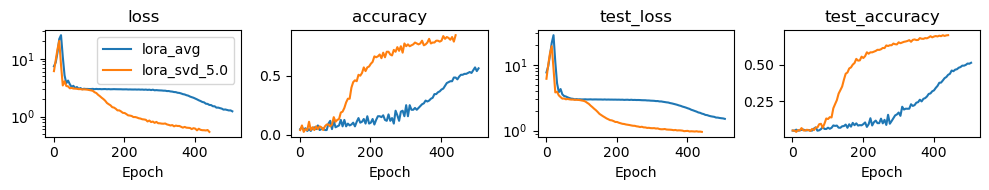

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/fedlora_uba_5.0/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_12/epoch_1000/


NotImplementedError: 

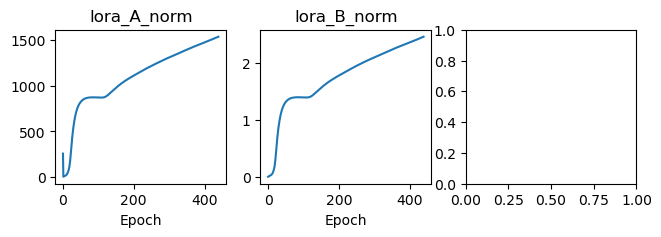

In [6]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.001, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd_1.0"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", "fedlora_uba": "1.0", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd_5.0"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", "fedlora_uba": "5.0", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svdhet"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd_het", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd_1.0"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd_5.0"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svdhet"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora_avg", "lora_svd_5.0"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)
plot_figures_opts_attrs(["lora_svd_5.0"], model_params, opt_params, attrs=["lora_A_norm", "lora_B_norm", "grad_norm"], start=0, end=-1)

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd_grad/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_12/epoch_1000/


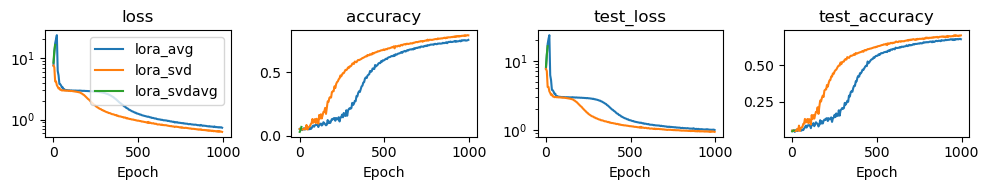

In [2]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.001, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_fza"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "lora_freeze": "a", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svdavg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd_grad", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_fza"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svdavg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora_avg", "lora_svd", "lora_svdavg"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
# pretrain
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 500 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --pretrain cls_head

# load fro pretrain
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.1 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --pretrain from --pretrain_epoch 500 --fedlora_avg svd

results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_cls_head/non_iid_0.01/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.1/moment_0.9/wd_0.0/batch_size_12/epoch_500/


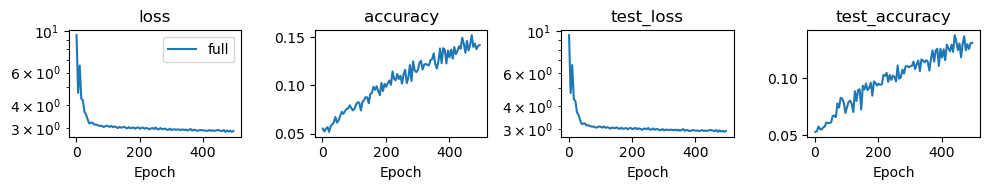

In [40]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.1, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.0, 12, 500
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["full"] = {"pretrain": "cls_head", "non_iid": non_iid_alpha, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}

opt_params = {}
opt_params["full"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["full"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_500/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.1/moment_0.9/wd_0.0/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_500/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.1/moment_0.9/wd_0.0/batch_size_12/epoch_1000/


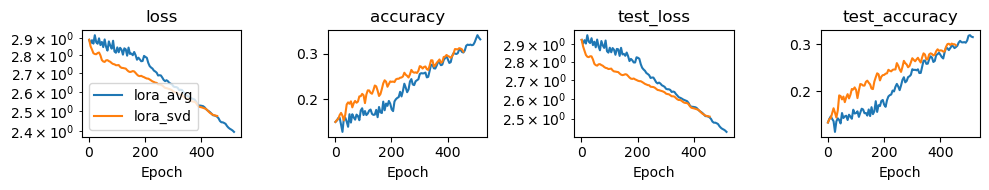

In [16]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.001, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"pretrain": "from", "pretrain_epoch": 500, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"pretrain": "from", "pretrain_epoch":500, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_avg"] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd"] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}

plot_figures_opts_attrs(["lora_avg", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_12/epoch_1000/


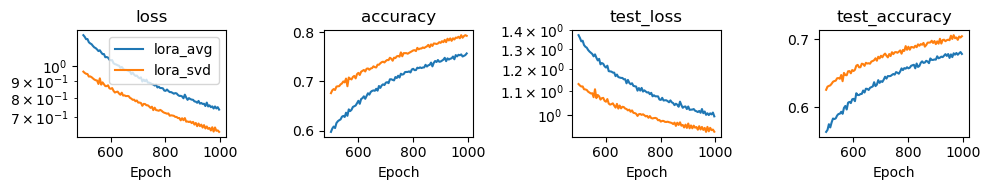

In [27]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.001, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["full"] = {"non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_fza"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "lora_freeze": "a", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["full"] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora"] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_avg"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_fza"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':1000}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora_avg", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=100)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.0 --weight_decay 0.0 --run_from_scratch 1 --client_num 10 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd

In [ ]:
## pretraining cls_head
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 100 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.01 --sketch_size -1 --pretrain cls_head

! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 100 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.002 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.01 --sketch_size -1 --pretrain cls_head

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_cls_head/non_iid_0.01/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.05/batch_size_12/epoch_100/


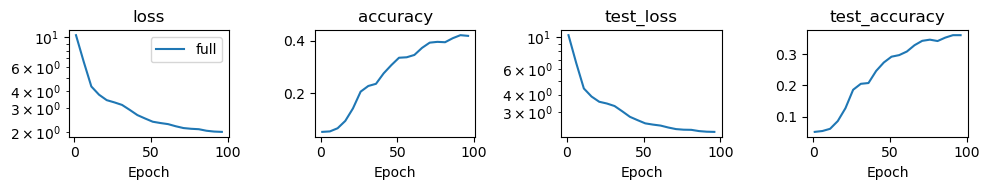

In [1]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.05, 12, 100
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["full"] = {"pretrain": "cls_head", "non_iid": non_iid_alpha, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}

opt_params = {}
opt_params["full"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["full"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)

In [ ]:
## lora from pretrained cls_head
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --pretrain from --pretrain_epoch 100
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg sketch_v2 --pretrain from --pretrain_epoch 100

results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd_v2/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/


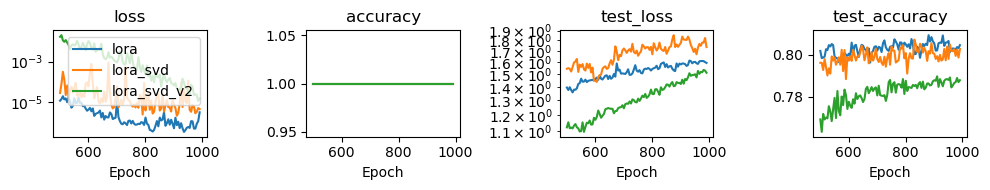

results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd_v2/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/


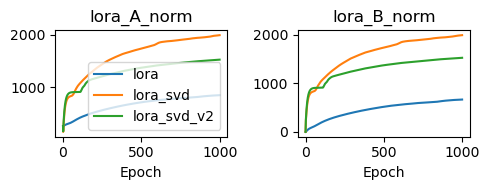

In [11]:

from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.01, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["lora"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd_v2"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd_v2", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_skt"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "sketch_v2", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd_v2"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_skt"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}

plot_figures_opts_attrs(["lora", "lora_svd", "lora_svd_v2"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=100, end=-1)
plot_figures_opts_attrs(["lora", "lora_svd", "lora_svd_v2"], model_params, opt_params, attrs=["lora_A_norm", "lora_B_norm"], start=0, end=-1)

In [ ]:
# lora rank 32
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 32 --pretrain from --pretrain_epoch 100 --fedlora_avg svd --train_stats 1

results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_32/lora_alpha_16/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_32/lora_alpha_16/fedlora_avg_svd/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/


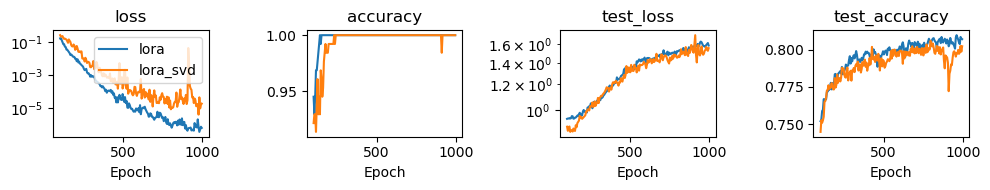

In [1]:

from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.01, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["lora"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_skt"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "sketch", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_skt"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}

plot_figures_opts_attrs(["lora", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=20)

In [ ]:
# weight decay = 0.05

results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.05/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.05/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_sketch_v2/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.05/batch_size_12/epoch_1000/


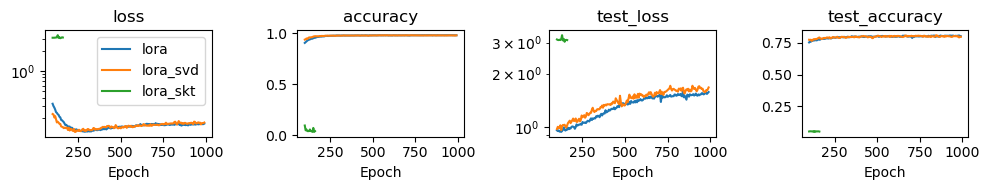

results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_sketch_v2/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.05/batch_size_12/epoch_1000/


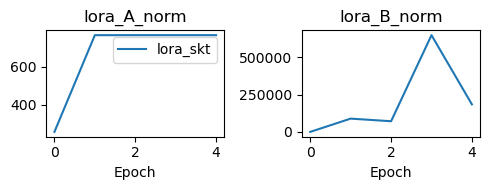

In [7]:

from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.05, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["lora"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_skt"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "sketch_v2", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["lora"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_skt"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}

plot_figures_opts_attrs(["lora", "lora_svd", "lora_skt"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=20, end=-1)
plot_figures_opts_attrs(["lora_skt"], model_params, opt_params, attrs=["lora_A_norm","lora_B_norm"], start=0, end=5)

In [ ]:
#pretrain with client adam server sgd
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 100 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.0 --weight_decay 0.0 --run_from_scratch 1 --client_num 100 --client_opt_name adam --client_epoch 1 --client_lr 0.001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --pretrain cls_head

! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.0 --weight_decay 0.0 --run_from_scratch 1 --client_num 100 --client_opt_name adam --client_epoch 1 --client_lr 0.001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --pretrain from --pretrain_epoch 100
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.0 --weight_decay 0.0 --run_from_scratch 1 --client_num 100 --client_opt_name adam --client_epoch 1 --client_lr 0.001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --pretrain from --pretrain_epoch 100 --train_stats 1 --fedlora_avg svd

results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_adam/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0/batch_size_12/epoch_1000/
results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_adam/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0/batch_size_12/epoch_1000/


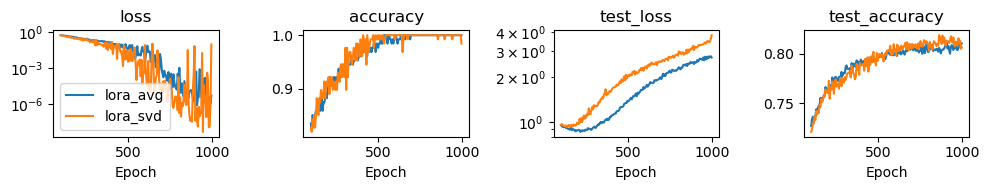

results/20newsgroups/CrossEntropyLoss/federated/gpt2/pretrain_from/pretrain_epoch_100/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_adam/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0/batch_size_12/epoch_1000/


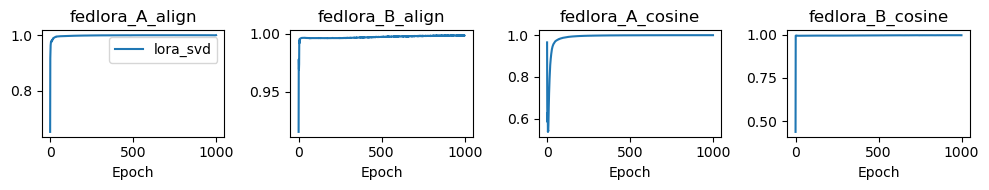

In [33]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 1.0, "20newsgroups", 'CrossEntropyLoss', "federated", 0.0, 0.0, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["lora_avg"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, 'server_opt': 'sgd', 'client_opt': "adam", 'client_lr': client_lr, 'client_momentum': 0.9, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"pretrain": "from", "pretrain_epoch": 100, "non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': "adam", 'client_lr': client_lr, 'client_momentum': 0.9, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}

opt_params = {}
opt_params["lora_avg"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}

plot_figures_opts_attrs(["lora_avg", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=20)
plot_figures_opts_attrs(["lora_svd"], model_params, opt_params, attrs=["fedlora_A_align", "fedlora_B_align", "fedlora_A_cosine", "fedlora_B_cosine"], start=0)

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.002 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --pretrain from --pretrain_epoch 100

In [ ]:
!  python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0 --run_from_scratch 1 --client_num 20 --client_opt_name sgd --client_epoch 5 --client_lr 0.005 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.01 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd --train_stats 1

In [ ]:
! python main.py --dataset 20newsgroups --model gpt2 --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0 --run_from_scratch 1 --client_num 20 --client_opt_name sgd --client_epoch 5 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.001 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd --train_stats 1

In [ ]:
CIFAR100

In [ ]:
! python main.py --dataset cifar100 --model google/vit-base-patch16-224-in21k --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd --train_stats 1
! python main.py --dataset cifar100 --model google/vit-base-patch16-224-in21k --loss CrossEntropyLoss --opt federated --lr 0.001 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.01 --run_from_scratch 1 --client_num 100 --client_opt_name sgd --client_epoch 1 --client_lr 0.001 --client_momentum 0.0 --server_opt adamw --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd --train_stats 1

results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/


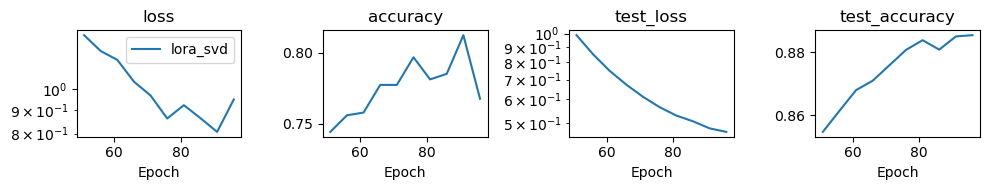

results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_1000/


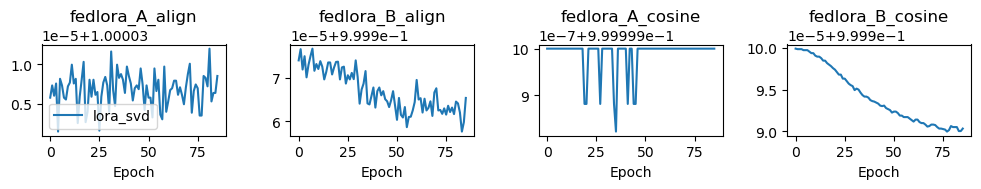

In [44]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "cifar100", 'CrossEntropyLoss', "federated", 0.9, 0.01, 12, 200
model_name= "google/vit-base-patch16-224-in21k"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.1

model_params = {}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  "fedlora_avg": "svd", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}

opt_params = {}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}

plot_figures_opts_attrs(["lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=10)
plot_figures_opts_attrs(["lora_svd"], model_params, opt_params, attrs=["fedlora_A_align", "fedlora_B_align", "fedlora_A_cosine", "fedlora_B_cosine"], start=10)

results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_12/epoch_1000/


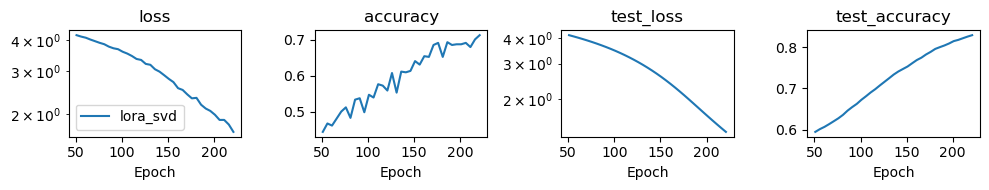

results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0/batch_size_12/epoch_1000/


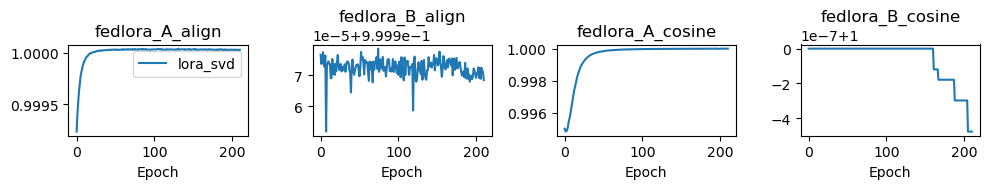

In [17]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 1.0, "cifar100", 'CrossEntropyLoss', "federated", 0.9, 0.0, 12, 200
model_name= "google/vit-base-patch16-224-in21k"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.1

model_params = {}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}

opt_params = {}
opt_params["lora_avg"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':1000}

plot_figures_opts_attrs(["lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=10)
plot_figures_opts_attrs(["lora_svd"], model_params, opt_params, attrs=["fedlora_A_align", "fedlora_B_align", "fedlora_A_cosine", "fedlora_B_cosine"], start=10)

In [ ]:
! python main.py --dataset cifar100 --model google/vit-base-patch16-224-in21k --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0001 --run_from_scratch 1 --client_num 100 --client_opt_name adam --client_epoch 1 --client_lr 0.001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd --train_stats 1
! python main.py --dataset cifar100 --model google/vit-base-patch16-224-in21k --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 1000 --analysis loss --log_interval 5 --batch_size 12 --momentum 0.9 --weight_decay 0.0001 --run_from_scratch 1 --client_num 100 --client_opt_name adam --client_epoch 1 --client_lr 0.001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --train_stats 1

In [ ]:
! python main.py --dataset cifar100 --model google/vit-base-patch16-224-in21k --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 100 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.9 --weight_decay 0.0001 --run_from_scratch 1 --client_num 10 --client_opt_name adam --client_epoch 1 --client_lr 0.001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd --train_stats 1 
! python main.py --dataset cifar100 --model google/vit-base-patch16-224-in21k --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 100 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.9 --weight_decay 0.0001 --run_from_scratch 1 --client_num 10 --client_opt_name adam --client_epoch 1 --client_lr 0.001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd --train_stats 1

results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_adam/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0001/batch_size_128/epoch_100/
results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_adam/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0001/batch_size_128/epoch_100/


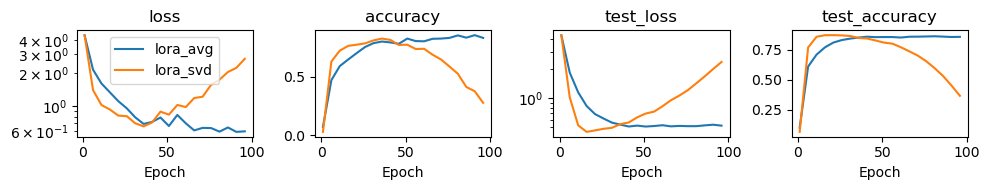

results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_adam/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.0001/batch_size_128/epoch_100/


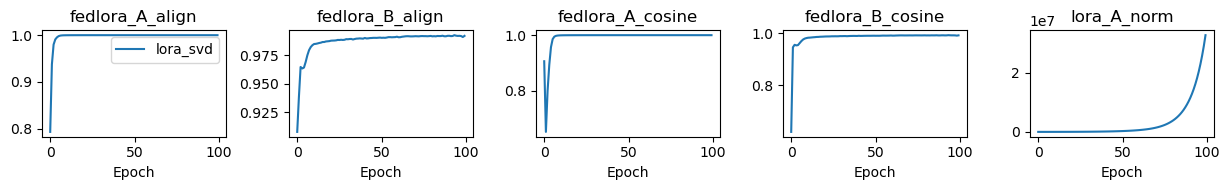

In [14]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 1.0, "cifar100", 'CrossEntropyLoss', "federated", 0.9, 0.0001, 128, 100
model_name= "google/vit-base-patch16-224-in21k"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="adam", 0.001, 0.9, 0.0, 10, 1, -1, 0.1

model_params = {}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}

opt_params = {}
opt_params["lora_avg"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora_avg", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=0)
plot_figures_opts_attrs(["lora_svd"], model_params, opt_params, attrs=["fedlora_A_align", "fedlora_B_align", "fedlora_A_cosine", "fedlora_B_cosine", "lora_A_norm"], start=0)

In [ ]:
## lr=0.1
! python main.py --dataset cifar100 --model google/vit-base-patch16-224-in21k --loss CrossEntropyLoss --opt federated --lr 0.1 --epoch 100 --analysis loss --log_interval 5 --batch_size 128 --momentum 0.9 --weight_decay 0.0001 --run_from_scratch 1 --client_num 10 --client_opt_name adam --client_epoch 1 --client_lr 0.001 --client_momentum 0.9 --server_opt sgd --non_iid_alpha 0.1 --sketch_size -1 --apply_lora --lora_rank 16 --fedlora_avg svd --train_stats 1 

results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_adam/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_0.1/moment_0.9/wd_0.0001/batch_size_128/epoch_100/
results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_adam/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_0.1/moment_0.9/wd_0.0001/batch_size_128/epoch_100/


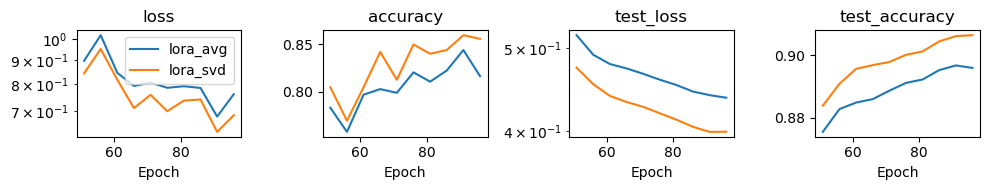

results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/server_opt_sgd/client_opt_adam/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_0.1/moment_0.9/wd_0.0001/batch_size_128/epoch_100/
results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_svd/server_opt_sgd/client_opt_adam/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_10/client_epoch_1/sketch_size_-1/lr_0.1/moment_0.9/wd_0.0001/batch_size_128/epoch_100/


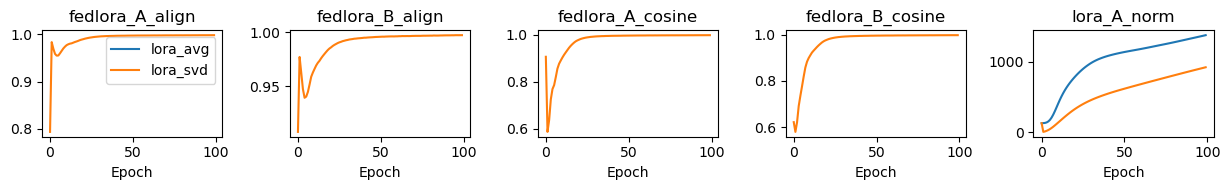

In [12]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.1, "cifar100", 'CrossEntropyLoss', "federated", 0.9, 0.0001, 128, 100
model_name= "google/vit-base-patch16-224-in21k"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="adam", 0.001, 0.9, 0.0, 10, 1, -1, 0.1

model_params = {}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  "fedlora_avg": "svd", 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}

opt_params = {}
opt_params["lora_avg"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["lora_avg", "lora_svd"], model_params, opt_params, attrs=["loss", "accuracy", "test_loss", "test_accuracy"], start=10)
plot_figures_opts_attrs(["lora_avg", "lora_svd"], model_params, opt_params, attrs=["fedlora_A_align", "fedlora_B_align", "fedlora_A_cosine", "fedlora_B_cosine", "lora_A_norm"], start=0)